In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('pima-indians-diabetes.csv', names = ['pregnant','plasma','pressure','thickness','insulin','bmi','pedigree','age','class'])
df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df[['pregnant','insulin']]

,pregnant,insulin
0,6,0
1,1,0
2,8,0
3,1,94
4,0,168
...,...,...
763,10,180
764,2,0
765,5,112
766,1,0


In [10]:
df_data = df[['pregnant', 'class']]
df_group = df_data.groupby(['pregnant'], as_index=False)
df_group.mean().sort_values(by='pregnant', ascending= True)

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


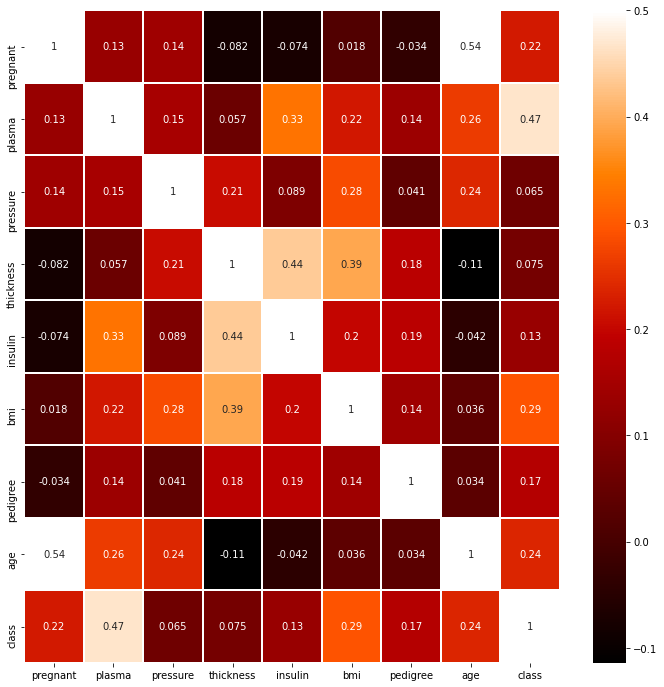

In [12]:
colormap = plt.cm.gist_heat
plt.figure(figsize=(12,12))

sns.heatmap(df.corr(),linewidths=0.1, vmax=0.5, cmap= colormap, linecolor='white', annot=True)
plt.show()

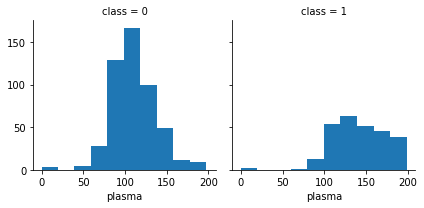

In [16]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins = 10)
plt.show()

In [24]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

np.random.seed(3)
tf.random.set_seed(3)

df = pd.read_csv('pima-indians-diabetes.csv', names = ['pregnant','plasma','pressure','thickness','insulin','bmi','pedigree','age','class'])
train, test = train_test_split(df, test_size = 0.2)

train_arr = train.to_numpy()
test_arr = test.to_numpy()

X_train = train_arr[:,0:8]
y_train = train_arr[:,8]
X_test = test_arr[:,0:8]
y_test = test_arr[:,8]

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

model.fit(X_train, y_train, epochs=200, batch_size=10)

print(model.evaluate(X_test,y_test)[1])



Epoch 1/200
62/62 [==============================] - 0s 594us/step - loss: 14.5766 - accuracy: 0.6415
Epoch 2/200
62/62 [==============================] - 0s 527us/step - loss: 8.0717 - accuracy: 0.6074
Epoch 3/200
62/62 [==============================] - 0s 540us/step - loss: 5.4674 - accuracy: 0.5150
Epoch 4/200
62/62 [==============================] - 0s 502us/step - loss: 3.3648 - accuracy: 0.5029
Epoch 5/200
62/62 [==============================] - 0s 523us/step - loss: 1.8048 - accuracy: 0.5206
Epoch 6/200
62/62 [==============================] - 0s 522us/step - loss: 1.1114 - accuracy: 0.5123
Epoch 7/200
62/62 [==============================] - 0s 517us/step - loss: 0.8038 - accuracy: 0.5800
Epoch 8/200
62/62 [==============================] - 0s 511us/step - loss: 0.9164 - accuracy: 0.5741
Epoch 9/200
62/62 [==============================] - 0s 528us/step - loss: 0.7432 - accuracy: 0.5542
Epoch 10/200
62/62 [==============================] - 0s 533us/step - loss: 0.7382 - accur

Epoch 81/200
62/62 [==============================] - 0s 505us/step - loss: 0.5057 - accuracy: 0.7373
Epoch 82/200
62/62 [==============================] - 0s 474us/step - loss: 0.4951 - accuracy: 0.7595
Epoch 83/200
62/62 [==============================] - 0s 490us/step - loss: 0.4918 - accuracy: 0.7555
Epoch 84/200
62/62 [==============================] - 0s 490us/step - loss: 0.5010 - accuracy: 0.7371
Epoch 85/200
62/62 [==============================] - 0s 490us/step - loss: 0.5553 - accuracy: 0.7181
Epoch 86/200
62/62 [==============================] - 0s 474us/step - loss: 0.4793 - accuracy: 0.7751
Epoch 87/200
62/62 [==============================] - 0s 490us/step - loss: 0.5205 - accuracy: 0.7441
Epoch 88/200
62/62 [==============================] - 0s 474us/step - loss: 0.5121 - accuracy: 0.7438
Epoch 89/200
62/62 [==============================] - 0s 479us/step - loss: 0.5471 - accuracy: 0.7378
Epoch 90/200
62/62 [==============================] - 0s 478us/step - loss: 0.4987

62/62 [==============================] - 0s 483us/step - loss: 0.4848 - accuracy: 0.7774
Epoch 161/200
62/62 [==============================] - 0s 474us/step - loss: 0.4876 - accuracy: 0.7476
Epoch 162/200
62/62 [==============================] - 0s 474us/step - loss: 0.4568 - accuracy: 0.7883
Epoch 163/200
62/62 [==============================] - 0s 474us/step - loss: 0.4723 - accuracy: 0.7870
Epoch 164/200
62/62 [==============================] - 0s 474us/step - loss: 0.4632 - accuracy: 0.7898
Epoch 165/200
62/62 [==============================] - 0s 491us/step - loss: 0.4576 - accuracy: 0.7700
Epoch 166/200
62/62 [==============================] - 0s 474us/step - loss: 0.4542 - accuracy: 0.8009
Epoch 167/200
62/62 [==============================] - 0s 474us/step - loss: 0.4964 - accuracy: 0.7503
Epoch 168/200
62/62 [==============================] - 0s 474us/step - loss: 0.4793 - accuracy: 0.7662
Epoch 169/200
62/62 [==============================] - 0s 474us/step - loss: 0.4590 - a

In [33]:
p=model.predict(X_test)
p

array([[1.66384369e-01],
       [8.30868721e-01],
       [1.14206612e-01],
       [2.91798711e-02],
       [4.50114727e-01],
       [5.40692925e-01],
       [1.60510957e-01],
       [1.82680964e-01],
       [1.72379196e-01],
       [9.34950113e-02],
       [7.41798818e-01],
       [1.91152364e-01],
       [9.86315906e-02],
       [7.89647460e-01],
       [7.61583149e-02],
       [1.72389597e-01],
       [5.35197794e-01],
       [7.25609064e-02],
       [2.19716340e-01],
       [5.71283579e-01],
       [2.06835151e-01],
       [2.83743858e-01],
       [1.12028629e-01],
       [3.49311769e-01],
       [5.57389855e-03],
       [6.74314857e-01],
       [3.14447045e-01],
       [2.98765242e-01],
       [4.82096583e-01],
       [2.21162617e-01],
       [8.42387557e-01],
       [1.86488003e-01],
       [3.37532192e-01],
       [8.67598057e-02],
       [6.25042915e-02],
       [3.50755572e-01],
       [2.15495110e-01],
       [2.87834406e-01],
       [1.69091821e-02],
       [5.62524199e-01],
